<img src="https://images.pexels.com/photos/187041/pexels-photo-187041.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
    style="height: 450px; width: 100%; object-fit: cover;">

# Linear Regression form scratch
## Introduction:
Here we'll go step by step on how we can perform linear regression from scratch using numpy library.

##### What is linear regression?
Linear regression is a supervised machine learning algorithm used to predict the value of a dependent variable based on one or more independent variables. It assumes a linear relationship between the dependent and independent variables and fits a linear equation to the observed data.
##### How does it work?
Linear regression works by fitting a line the best way it can into the data to in order to predict outcomes. It uses the equation of line **"y=mx+b"** where:
- y is the outcome (the dependent variable).
- m is the gradient or slope of the line.
- x is the predictor (the independent variable) also known as the features.
- b is the intercept of the line i.e where the line meets the y-axis.

Let's start demonstrating how it works with code. First let's import the necessary libraries and using a small sample data of revenue generated in each month. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

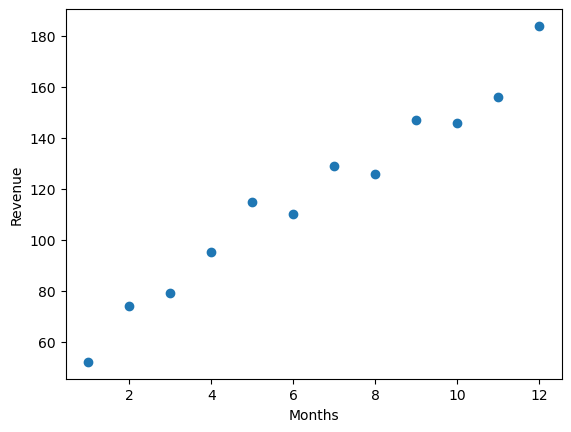

In [46]:
# Consider the following data.
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
revenue = np.array([52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184])

# plot the data to see how it looks
plt.plot(months, revenue, "o")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

Let's try fitting a regression line maually by guessing the intercept (b) and the slope (m) of the line

In [51]:
# slope
m = 7
# intercept
b = 0

y_predict = (m*months) + b

print(y_predict)

[ 7 14 21 28 35 42 49 56 63 70 77 84]


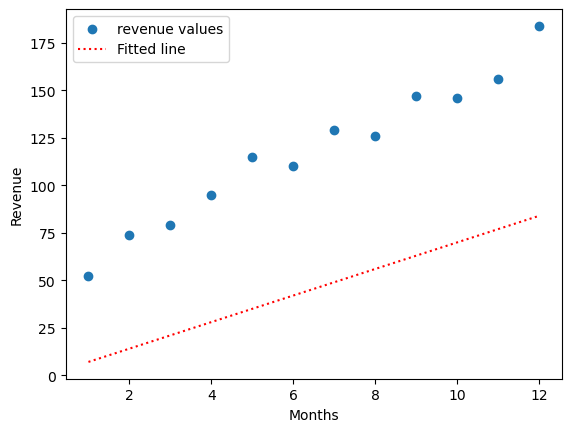

In [52]:
# Now that we see the predicted values for the line, how well does it fit?
plt.scatter(months, revenue, label="revenue values")
plt.plot(months, y_predict, color='r', label="Fitted line", linestyle=":")
plt.legend(loc=2)
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

### Loss
Now that we see how well the line fits the points when we try to guess the values for the `intercept` and `slope`, let's see just how "off" we are. That's when we calculate the loss. <br>
The loss is calculated using the following formula:<br>
*Loss = sum((y_true - y_predict)^2)* <br>
this is also known as the squared error. In our case the loss will be calculated as:<br>
Loss = (52-15)^2 + (74-30)^2 + (79-45)^2 ...<br>
we use squared errors instead of just errors because we want each value to contribute to the loss function as there might be negative values. The goal here is of course to minimize the loss as much as possible, to do that we can try tweaking the intercept and slope values manually, but then that wouldn't be a good option. A more effective way to do this is to find the derivative of the loss function with respect to the intercept and slope values, then take steps towards the bottom of the gradient.


In [14]:
# Let's start by first finding the loss in our model
squared_error = [(a-b)**2 for a, b in zip(revenue, y_predict)]

print("The total loss:", sum(squared_error))

The total loss: 64875


### Minimizing loss
As discussed above one of the ways to minimize the loss is to find the derivative of the loss function with respect to the intercept and slope. The derivatives will look like this:<br>
* Slope: <br>
-2/N*sum(y_true - (mx + b)) where N is the length of the datasets. Let's take it step by step:<br>
our loss function is sum((y_true - y_predict)^2),<br>
but y_predict = mx + b,<br>
therefore loss = sum((y_true - (mx +b))^2)<br>
when we find the derivative with respect to "b" using chain rule we'll have:<br>
-2(y_true - (mx +b)).<br> Since we're dealing with a sum we divide the function by the number of points in our dataset (N)<br>
then finally we got **-2/N * sum(y_true - (mx +b))**

* Intercept:<br>
Using similar methods when we differentiate we get: <br>
**-2/N*sum(x(y_true - (mx +b)))**


In [19]:
# intercept
def gradient_intercept(x_val, y_true, slope, intercept):
    line_function = (slope*np.array(x_val)) + intercept
    gradient1 = sum([b - a for a, b in zip(line_function, y_true)])
    gradient_int = (-2 / len(x_val)) * gradient1
    return gradient_int

# slope
def gradient_slope(x_val, y_true, slope, intercept):
    line_function = (slope*np.array(x_val)) + intercept
    gradient1 = sum([x*(b - a) for a, b, x in zip(line_function, y_true, x_val)])
    gradient_slp = (-2 / len(x_val)) * gradient1
    return gradient_slp



### Gradient Descent
Once we have the function to minimize our loss, the next step is to move down the error curve in a process called *gradient descent*. This involves taking incremental steps, the size of which is determined by the *learning rate*. The learning rate controls how small or large these steps are as we move closer to the point of minimum error.

We continue taking these steps iteratively, adjusting the parameters of our model, until we can no longer reduce the error. If the error begins to rise instead, it indicates that we’ve gone past the optimal point. At this stage, the model has achieved its best accuracy, and the process stops. Gradient descent helps us efficiently find the optimal values for our model parameters.

### Learning Rate
When we calculate the derivative of the loss function with respect to the intercept and slope, the next step is to desent the gradient. This is when learning rate comes into play as we take steps along the error curve towards the point where the error is smallest.

However, the size of these steps—controlled by the learning rate—is crucial. If the steps are too large, we risk overshooting the minimum error point, causing the model to oscillate or diverge. On the other hand, if the steps are too small, the optimization process will be very slow, taking a long time to converge to the minimum.

To strike a balance, the learning rate must be just right. A commonly used default value for the learning rate is 0.01, which works well in many cases. However, the optimal learning rate can vary depending on the specific problem and dataset, and often needs to be fine-tuned for best results.

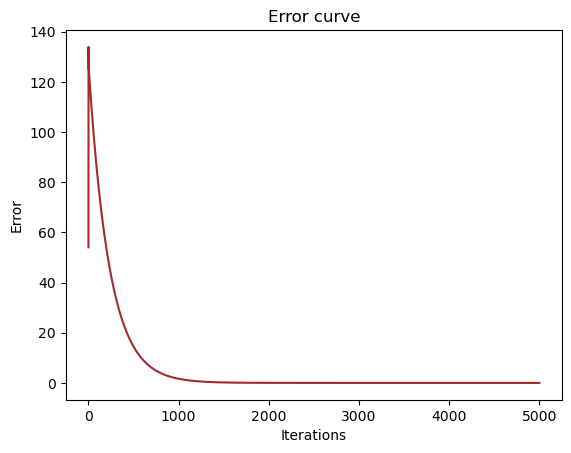

Final intercept: 50.22727270939376
Final slope: 10.38811189026599


In [48]:
# redefine the intercept and slope variables

m = 7
b = 0
learning_rate = 0.01
iterations = 5000
errors = []

for epoch in range(iterations):
    slope_gradient = gradient_slope(months, revenue, m, b)
    intercept_gradient = gradient_intercept(months, revenue, m, b)
    # update the values
    m -= slope_gradient * learning_rate
    b -= intercept_gradient * learning_rate
    # errors 
    line_function = (m * np.array(months)) + b
    error = sum([b - a for a, b in zip(line_function, revenue)])
    errors.append(error)

# use our updated variable in our line equation
y_predict = [m*x + b for x in months]
err_array = np.array(errors)
# plot the error curve
x_axis = list(range(iterations))
plt.plot(x_axis, errors, color="brown")
plt.title("Error curve")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

print("Final intercept:", b)
print("Final slope:", m)

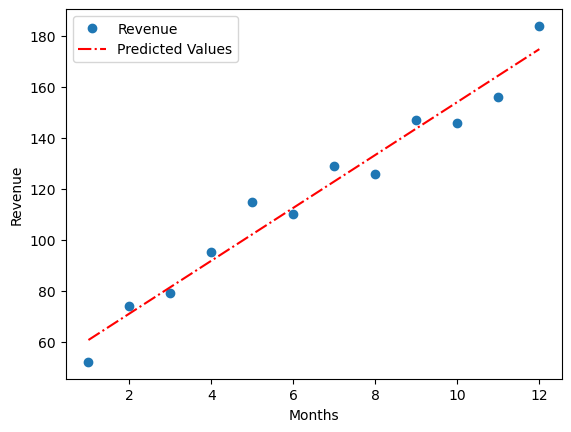

In [49]:
plt.plot(months, revenue, "o", label="Revenue")
plt.plot(months, y_predict, color="r", linestyle="-.", label="Predicted Values")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

# Conclusion
Linear regression, as one of the foundational techniques in machine learning, is a powerful tool for understanding and predicting relationships between variables. Its simplicity and interpretability make it an essential method for tackling real-world problems across a variety of domains. From predicting house prices to things predicting stock market prices, forecasting business revenue, supports environmental scientists in modeling climate change trends and so on.

In Python, several libraries facilitate the implementation of linear regression, offering a range of tools for data analysis and model building. Key libraries include:

Scikit-learn: Provides robust implementations of linear regression with additional options for regularization (e.g., Ridge and Lasso regression).
Statsmodels: Offers detailed statistical summaries, making it ideal for in-depth analysis of linear regression models.
Pandas and NumPy: Essential for preprocessing and manipulating data, ensuring that it’s in the right format for modeling.

By leveraging these tools and considerations, linear regression remains a vital part of the machine learning toolkit. While it is simple compared to more advanced algorithms, its explanatory power and utility in understanding data make it a go-to method for many practical applications.